In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict 
from torchvision.datasets import ImageFolder

In [ ]:
datasets_names = ['APTOS', 'DDR', 'FGADR', 'IDRiD', 'Messidor']
datasets = defaultdict(dict) 
path = 'datasets'
for name in datasets_names: 
    for split in ['train', 'valid', 'test']: 
        dataset_path = f'datasets/{name}/{split}'
        datasets[name][split] = ImageFolder(dataset_path)

In [65]:
!pip install tabulate

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [66]:
pd.DataFrame(
{
    "Dataset" : datasets_names, 
    "Train size" : list(map(len, [datasets[name]['train'] for name in datasets_names])),
    "Valid size" : list(map(len, [datasets[name]['valid'] for name in datasets_names])),
    "Test size" : list(map(len, [datasets[name]['test'] for name in datasets_names])),
    "Total size" : [ len(datasets[name]['train']) + len(datasets[name]['valid']) +  len(datasets[name]['test'])  for name in datasets_names],

}
).set_index("Dataset").to_markdown()

'| Dataset   |   Train size |   Valid size |   Test size |   Total size |\n|:----------|-------------:|-------------:|------------:|-------------:|\n| APTOS     |         3112 |          550 |        1928 |         5590 |\n| DDR       |         6260 |         2503 |        3759 |        12522 |\n| FGADR     |         1289 |          277 |         276 |         1842 |\n| IDRiD     |          351 |           62 |         103 |          516 |\n| Messidor  |         1220 |          262 |         262 |         1744 |'

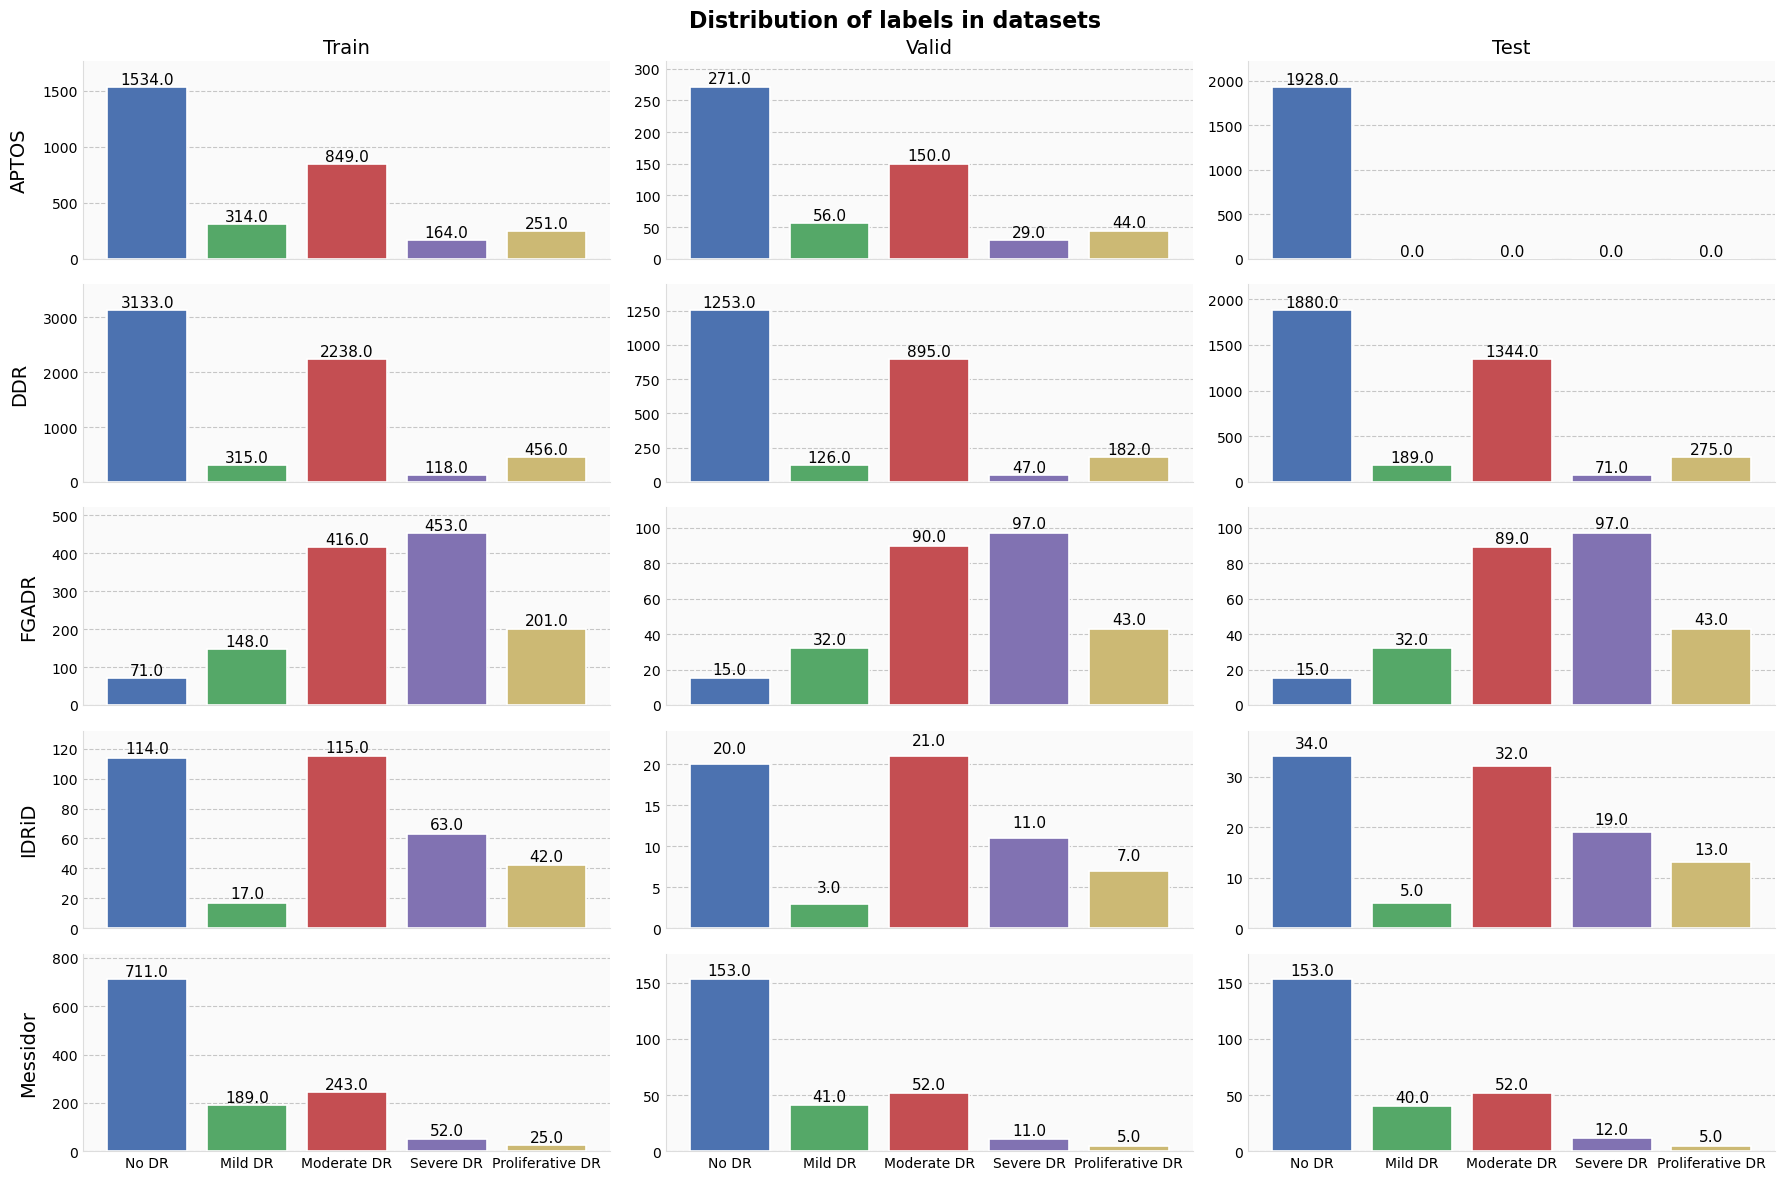

In [49]:
labels = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']
fig, axs = plt.subplots(nrows = len(datasets_names), ncols = 3, sharex = True, figsize = (18, 12))
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974']


# Customize the plot appearance
plt.suptitle('Distribution of labels in datasets', fontsize=16, fontweight='bold')


for i, name in enumerate(datasets_names): 
    for j, split in enumerate(['Train', 'Valid', 'Test']): 
        
        counts = np.zeros(5)
        
        for idx, (_, label) in enumerate(datasets[name][split.lower()]): 
            counts[label] += 1
        
        bars = axs[i][j].bar(labels, counts, color=colors, edgecolor='white', linewidth=1.2)


        for bar in bars:
            height = bar.get_height()
            axs[i][j].text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height}',
                    ha='center', va='bottom', fontsize=11)
        if j == 0: 
            axs[i][j].set_ylabel(name, labelpad=10, fontsize=14)
        if i == 0: 
            axs[i][j].set_title(split, fontsize=14)
        #axs[i][j].set_title(f'{name} {split} labels distr.', fontsize=12)
        
        for spine in ['top', 'right']:
            axs[i][j].spines[spine].set_visible(False)
        axs[i][j].spines['bottom'].set_color('#DDDDDD')
        axs[i][j].spines['left'].set_color('#DDDDDD')


        axs[i][j].set_axisbelow(True)
        axs[i][j].grid(axis='y', linestyle='--', alpha=0.7)
        axs[i][j].tick_params(axis='both', which='both', length=0)

        axs[i][j].set_ylim(0, max(counts) * 1.15)
        axs[i][j].set_facecolor('#FAFAFA')
plt.savefig('distribution.png')
plt.tight_layout()
plt.show()

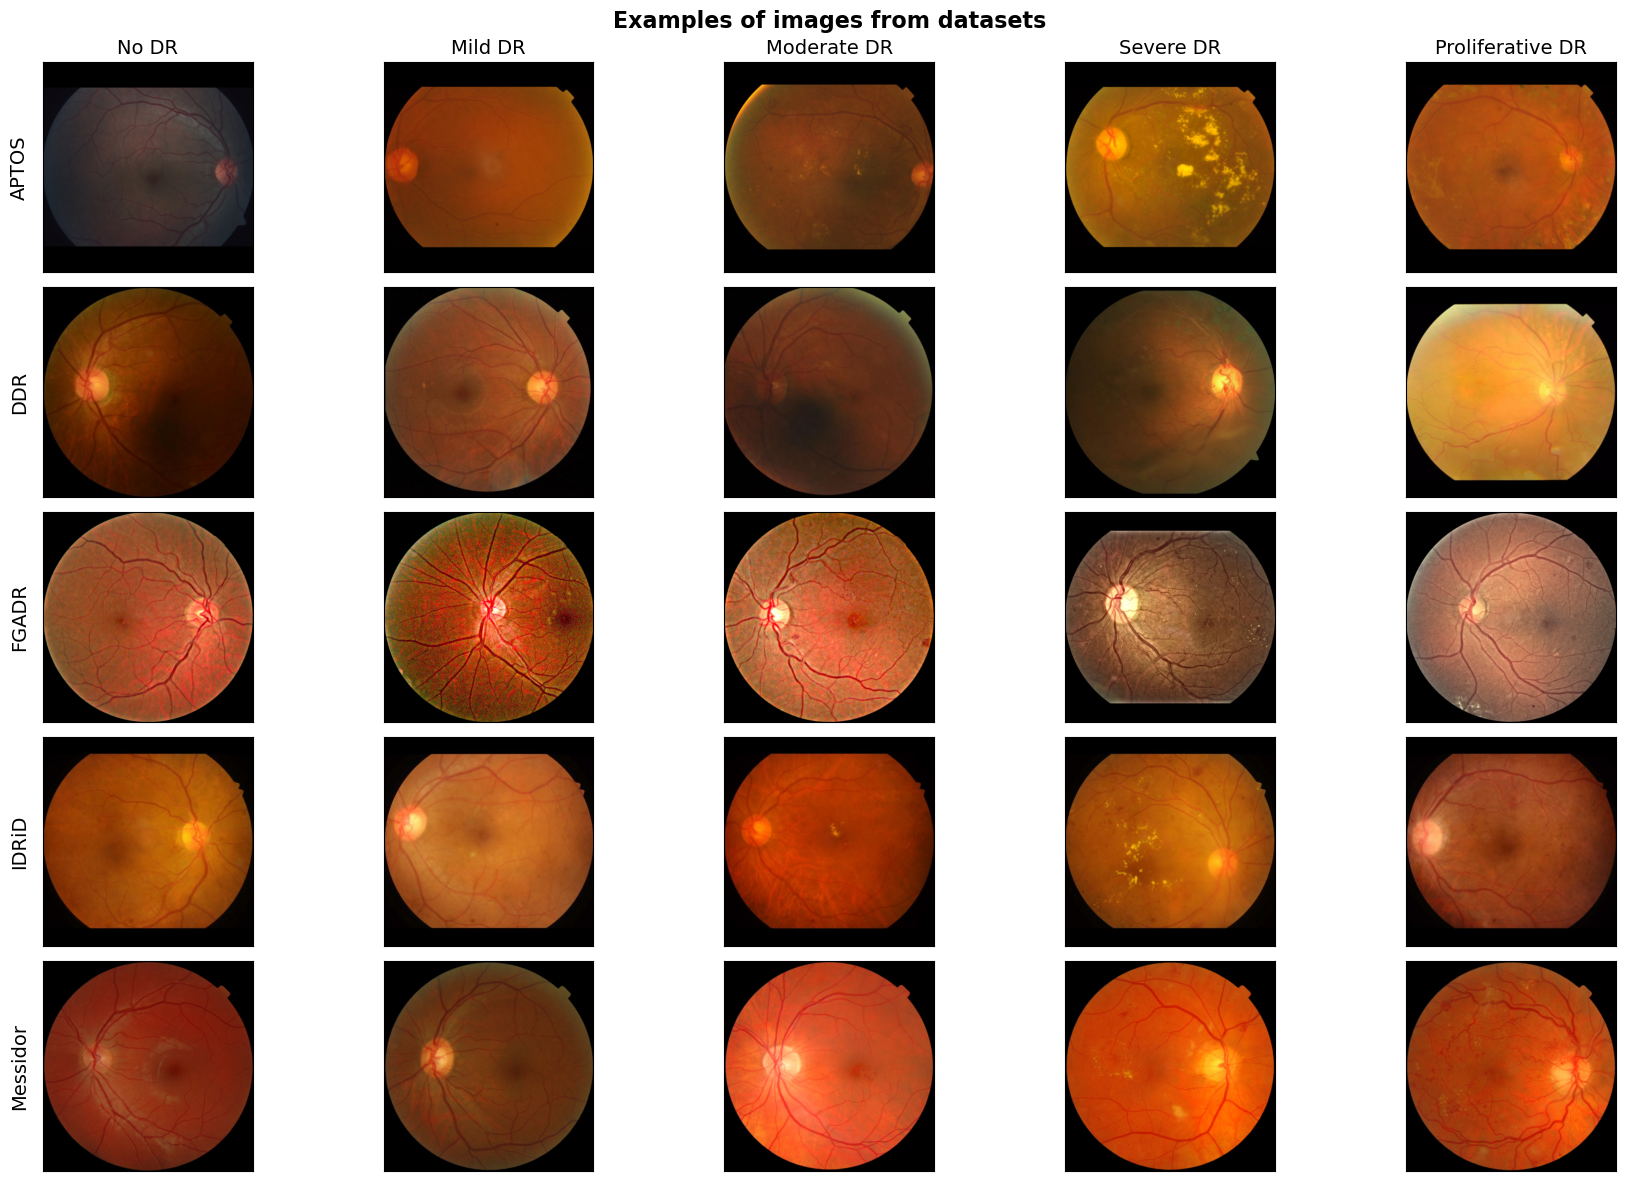

In [54]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']

fig, axs = plt.subplots(nrows = len(datasets_names), ncols = 5, sharex = True, figsize = (18, 12))
plt.suptitle('Examples of images from datasets', fontsize=16, fontweight='bold')


for i, name in enumerate(datasets_names): 
    for j, label in enumerate(range(5)): 
        
        img_plot = None
        
        for idx, (img, curr_label) in enumerate(datasets[name]['train']): 
            if curr_label == label : 
                img_plot = img
                break
        
        axs[i][j].imshow( np.array( img_plot ) ) 
        axs[i][j].get_xaxis().set_ticks([])
        axs[i][j].get_yaxis().set_ticks([])
        
        if j == 0: 
            axs[i][j].set_ylabel(name, labelpad=10, fontsize=14)
        if i == 0: 
            axs[i][j].set_title(labels[label], fontsize=14)

plt.tight_layout()
plt.show()

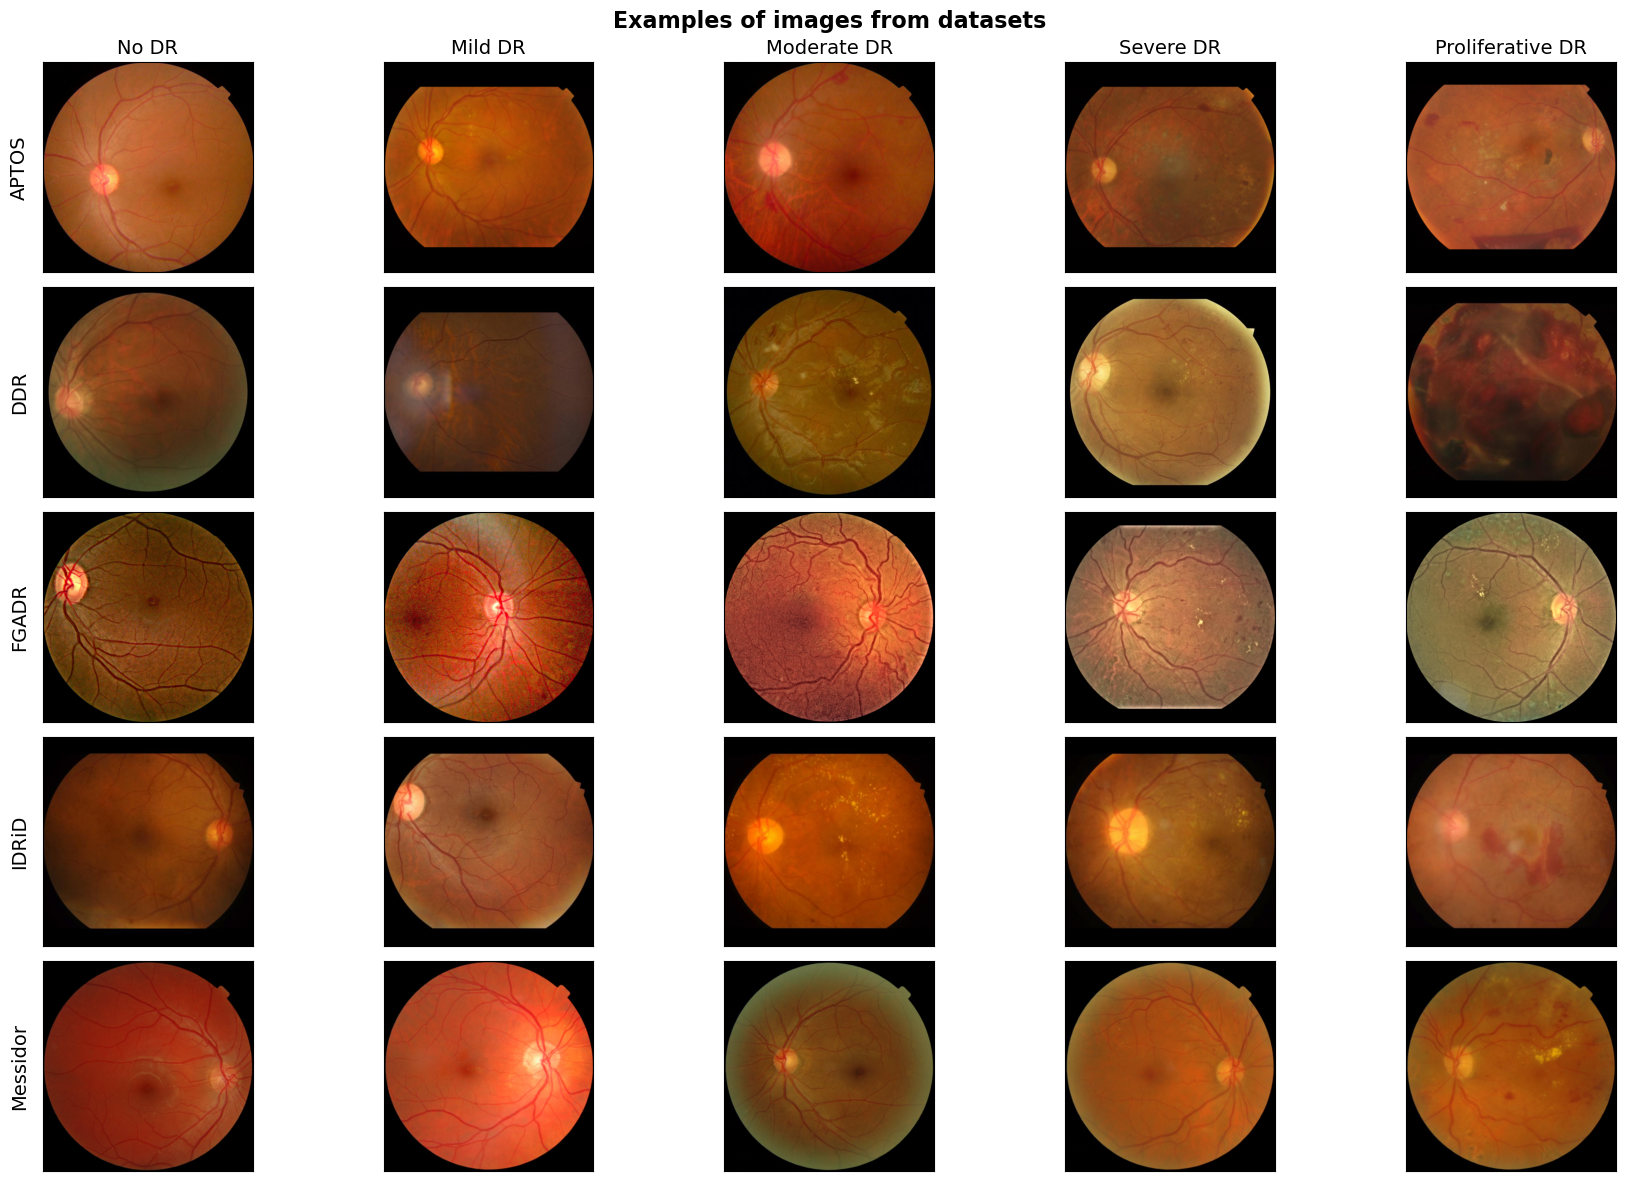

In [55]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']

fig, axs = plt.subplots(nrows = len(datasets_names), ncols = 5, sharex = True, figsize = (18, 12))
plt.suptitle('Examples of images from datasets', fontsize=16, fontweight='bold')


for i, name in enumerate(datasets_names): 
    for j, label in enumerate(range(5)): 
        
        img_plot = None
        
        for idx, (img, curr_label) in enumerate(datasets[name]['valid']): 
            if curr_label == label : 
                img_plot = img
                break
        
        axs[i][j].imshow( np.array( img_plot ) ) 
        axs[i][j].get_xaxis().set_ticks([])
        axs[i][j].get_yaxis().set_ticks([])
        
        if j == 0: 
            axs[i][j].set_ylabel(name, labelpad=10, fontsize=14)
        if i == 0: 
            axs[i][j].set_title(labels[label], fontsize=14)

plt.tight_layout()
plt.show()